[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

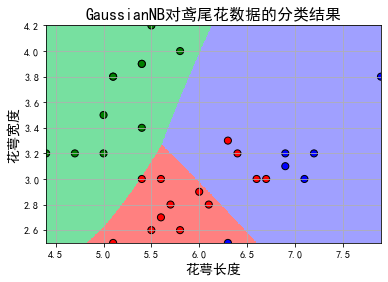

选取后两个特征值
训练数据集样本数目：120，测试数据集样本数目：30
测试集准确度：0.967
训练集准确度：0.958


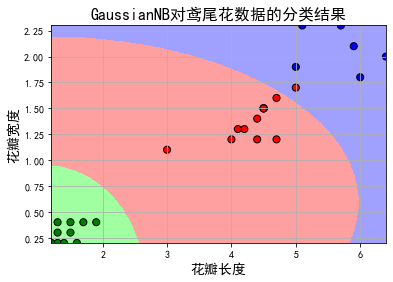

In [1]:
#导入数据分析所需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.csv',header=None)
x = data.drop([4],axis=1)
x = x.drop([0],axis=0)
x = np.array(x,dtype=float)
print(x)
y=pd.Categorical(data[4]).codes
print(data[4])
y=y[1:151]
print(y)
p=x[:,2:5]

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,train_size=0.8,random_state=14)
x_train,x_test,y_train,y_test=x_train1,x_test1,y_train1,y_test1
print('训练数据集样本数目：%d，测试数据集样本数目：%d'%(x_train.shape[0],x_test.shape[0]))
clf=GaussianNB()
ir=clf.fit(x_train,y_train)
y_pred=ir.predict(x_test)
acc = np.sum(y_test == y_pred)/x_test.shape[0]
print('测试集准确度：%.3f'% acc)
y_pred = ir.predict(x_train)
acc = np.sum(y_train == y_pred)/x_train.shape[0]
print('训练集准确度：%.3f'% acc)

print('选取前两个特征值')
p=x[:,:2]
p_train1,p_test1,y_train1,y_test1=train_test_split(p,y,train_size=0.8,random_state=1)
p_train,p_test,y_train,y_test=p_train1,p_test1,y_train1,y_test1
print('训练数据集样本数目：%d，测试数据集样本数目：%d'%(p_train.shape[0],p_test.shape[0]))
clf=GaussianNB()
ir=clf.fit(p_train,y_train)
y_pred=ir.predict(p_test)
acc = np.sum(y_test == y_pred)/p_test.shape[0]
print('测试集准确度：%.3f'% acc)
y_pred = ir.predict(p_train)
acc = np.sum(y_train == y_pred)/p_train.shape[0]
print('训练集准确度：%.3f'% acc)

p1_max,p1_min = max(p_test[:,0]),min(p_test[:,0])
p2_max,p2_min = max(p_test[:,1]),min(p_test[:,1])
t1 = np.linspace(p1_min,p1_max,500)
t2 = np.linspace(p2_min,p2_max,500)
p1,p2 = np.meshgrid(t1,t2)#生成网格采样点
p_test1 = np.stack((p1.flat, p2.flat), axis=1)
y_hat = ir.predict(p_test1)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
plt.pcolormesh(p1, p2, y_hat.reshape(p1.shape),shading='auto', cmap=cm_light) # 预测值的显示
plt.scatter(p_test[:, 0], p_test[:, 1], c=y_test, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
plt.title(u'GaussianNB对鸢尾花数据的分类结果', fontsize=16)
plt.grid(True)
plt.xlim(p1_min, p1_max)
plt.ylim(p2_min, p2_max)
plt.show()

print('选取后两个特征值')
q=x[:,2:4]
q_train1,q_test1,y_train1,y_test1=train_test_split(q,y,train_size=0.8,random_state=1)
q_train,q_test,y_train,y_test=q_train1,q_test1,y_train1,y_test1
print('训练数据集样本数目：%d，测试数据集样本数目：%d'%(q_train.shape[0],q_test.shape[0]))
clf=GaussianNB()
ir=clf.fit(q_train,y_train)
y_pred=ir.predict(q_test)
acc = np.sum(y_test == y_pred)/q_test.shape[0]
print('测试集准确度：%.3f'% acc)
y_pred = ir.predict(q_train)
acc = np.sum(y_train == y_pred)/q_train.shape[0]
print('训练集准确度：%.3f'% acc)

q1_max,q1_min = max(q_test[:,0]),min(q_test[:,0])
q2_max,q2_min = max(q_test[:,1]),min(q_test[:,1])
t1 = np.linspace(q1_min,q1_max,500)
t2 = np.linspace(q2_min,q2_max,500)
q1,q2 = np.meshgrid(t1,t2)#生成网格采样点
q_test1 = np.stack((q1.flat, q2.flat), axis=1)
y_hat = ir.predict(q_test1)
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
plt.pcolormesh(q1, q2, y_hat.reshape(q1.shape),shading='auto', cmap = cm_light) # 预测值的显示
plt.scatter(q_test[:, 0], q_test[:, 1], c=y_test, edgecolors='k', s=50, cmap= cm_dark)  # 样本
plt.xlabel(u'花瓣长度', fontsize=14)
plt.ylabel(u'花瓣宽度', fontsize=14)
plt.title(u'GaussianNB对鸢尾花数据的分类结果', fontsize=16)
plt.grid(True)
plt.xlim(q1_min, q1_max)
plt.ylim(q2_min, q2_max)
plt.show()


In [9]:
#导入数据分析所需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.csv',header=None)
print(data)
x = data.drop([4],axis=1)
x = x.drop([0],axis=0)
x = np.array(x,dtype=float)
print(x)
# y=pd.Categorical(data[4]).codes
# print(data[4])
# y=y[1:151]
# print(y)
# p=x[:,2:5]


                0            1             2            3          4
0    sepal.length  sepal.width  petal.length  petal.width    species
1             5.1          3.5           1.4          0.2     Setosa
2             4.9            3           1.4          0.2     Setosa
3             4.7          3.2           1.3          0.2     Setosa
4             4.6          3.1           1.5          0.2     Setosa
..            ...          ...           ...          ...        ...
146           6.7            3           5.2          2.3  Virginica
147           6.3          2.5             5          1.9  Virginica
148           6.5            3           5.2            2  Virginica
149           6.2          3.4           5.4          2.3  Virginica
150           5.9            3           5.1          1.8  Virginica

[151 rows x 5 columns]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0